In [27]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [28]:
np.random.seed(42)
X = 2 * np.random.rand(20, 1)
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(20, 1)

# Visualize the original data

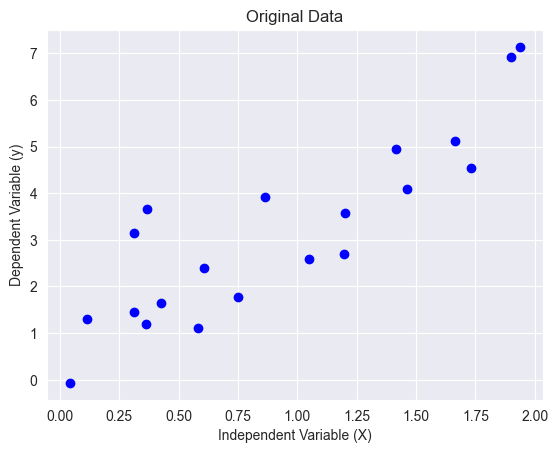

In [29]:
plt.scatter(X, y, color='blue')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Original Data')
plt.show()

# Create polynomial features (let's use a 2nd-degree polynomial)

In [30]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression model

In [31]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

# Visualize the fitted polynomial curve

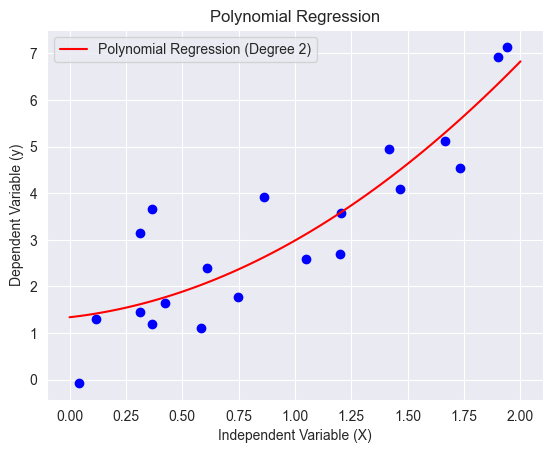

In [32]:
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='blue')
plt.plot(X_range, y_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

R-squared (Training): 0.7697
R-squared (Testing): 0.8106


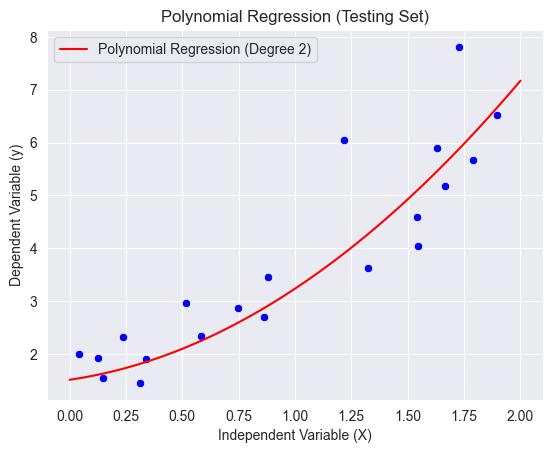

In [33]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Generate a simple dataset with a quadratic relationship
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (let's use a 2nd-degree polynomial)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_poly)

# Make predictions on the testing set
y_test_pred = model.predict(X_test_poly)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R-squared (Training): {r2_train:.4f}')
print(f'R-squared (Testing): {r2_test:.4f}')

# Visualize the fitted polynomial curve on the testing set using Seaborn
X_range = np.linspace(0, 2, 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred = model.predict(X_range_poly)

sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), color='blue')
sns.lineplot(x=X_range.flatten(), y=y_range_pred.flatten(), color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Polynomial Regression (Testing Set)')
plt.legend()
plt.show()


# Polynomial Regression with inbuilt dataset

# Import necessary libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris

In [35]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

In [36]:
# Selecting only 'sepal length (cm)' feature and the target column
data = np.column_stack((data[:, 0], target))

In [37]:
# Check if there are enough samples for the specified test size
if len(data) < 2:
    raise ValueError("Insufficient samples in the dataset. Please use a larger dataset.")

In [38]:
X_sepal_length = data[:, 0].reshape(-1, 1)  # 'sepal length (cm)' feature
y_species = data[:, 1]  # Target column (iris species)


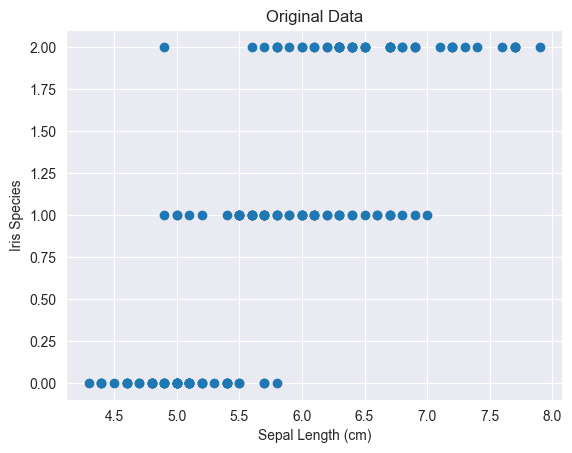

In [39]:
# Visualize the relationship between sepal length and iris species
plt.scatter(X_sepal_length, y_species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Iris Species')
plt.title('Original Data')
plt.show()


In [40]:
# Split the data into training and testing sets, ensuring a valid split
X_train, X_test, y_train, y_test = train_test_split(X_sepal_length, y_species, test_size=0.2, random_state=42, shuffle=True)

In [41]:
# Check if the training set is not empty
if len(X_train) == 0:
    raise ValueError("Empty training set. Adjust the test_size or provide a larger dataset.")

In [42]:
# Create PolynomialFeatures object to transform the features
poly_features = PolynomialFeatures(degree=2)

In [43]:
# Transform the features to include polynomial terms
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [44]:
# Create a Linear Regression model
lin_reg = LinearRegression()

In [45]:
# Fit the model using the polynomial features
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

In [46]:
# Visualize the original data and the fitted polynomial curve
X_range = np.linspace(X_sepal_length.min(), X_sepal_length.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_pred = lin_reg.predict(X_range_poly)


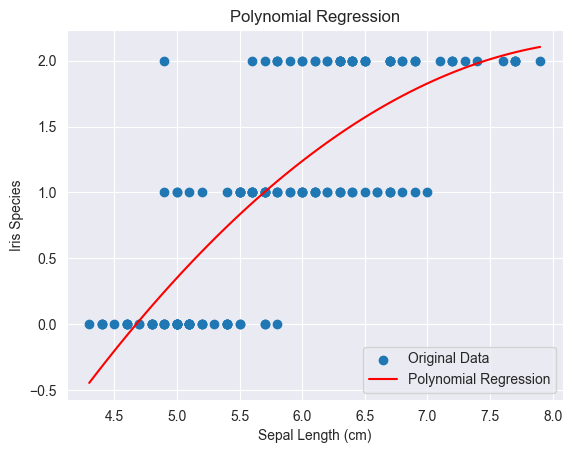

In [47]:
# Plot the original data and the fitted polynomial curve
plt.scatter(X_sepal_length, y_species, label='Original Data')
plt.plot(X_range, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Iris Species')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [48]:
# Evaluate the model on the test set
y_pred_test = lin_reg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error on Test Set: {mse}')


Mean Squared Error on Test Set: 0.18052481214044241
